In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd

# Parte 1: Velocidade da luz no ar

In [2]:
#Distância medida
delta_x = np.array(np.arange(1,1.65,0.05)) #m

#Incerteza da distância
sigma_x = np.full(len(delta_x), 5e-4) #m

#Intervalo de tempo
delta_t = np.array([6.34, 7.42, 7.74, 8.06, 8.46, 8.74, 9.06, 9.38, 9.78, 10.00, 10.30, 10.70,10.90])*1e-9 #s

#Incerteza do tempo segundo o manual
sigma_t = np.full(len(delta_t), 100e-12)

## Calculando a velocidade e sua incerteza:

A velocidade da luz pode ser calculada utilizando que:

$$c = \frac{\Delta s}{\Delta t}$$

Lembrando que $\Delta s = 2\Delta x$:

$$c = \frac{2\Delta x}{\Delta t}$$

Propagando a incerteza de $\Delta x$ e $\Delta t$:

$$\sigma_{c} = \sqrt{\left(\frac{\partial c}{\partial \Delta x}\right)^2\sigma^2_{\Delta x} + \left(\frac{\partial c}{\partial \Delta t}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \sqrt{\left(\frac{\partial }{\partial \Delta x} \frac{2\Delta x}{\Delta t}\right)^2\sigma^2_{\Delta x} + \left(\frac{\partial }{\partial \Delta t}\frac{2\Delta x}{\Delta t}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \sqrt{\left(\frac{2}{\Delta t}\right)^2\sigma^2_{\Delta x} + \left(\frac{2\Delta x}{\Delta t^2}\right)^2\sigma^2_{\Delta t}}$$

$$\sigma_{c} = \frac{2 \Delta x}{\Delta t}\sqrt{\left(\frac{\sigma_{\Delta x}}{\Delta x}\right)^2 + \left(\frac{\sigma_{\Delta t}}{\Delta t}\right)^2}$$

$$\sigma_{c} = c\sqrt{\left(\frac{\sigma_{\Delta x}}{\Delta x}\right)^2 + \left(\frac{\sigma_{\Delta t}}{\Delta t}\right)^2}$$

In [3]:
#Velocidade da luz
c = 2*delta_x/delta_t

#Incerteza da velocidade
sigma_c = c*np.sqrt((sigma_x/delta_x)**2 + (sigma_t/delta_t)**2)
sigma_c =  [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_c]

print('c = ',c)
print('sigma_c = ', sigma_c)

c =  [3.15457413e+08 2.83018868e+08 2.84237726e+08 2.85359801e+08
 2.83687943e+08 2.86041190e+08 2.86975717e+08 2.87846482e+08
 2.86298569e+08 2.90000000e+08 2.91262136e+08 2.89719626e+08
 2.93577982e+08]
sigma_c =  [5000000.0, 3800000.0, 3700000.0, 3500000.0, 3400000.0, 3300000.0, 3200000.0, 3100000.0, 2900000.0, 2900000.0, 2800000.0, 2700000.0, 2700000.0]


## Calculando a velocidade média e sua incerteza:


In [4]:
c_mean = np.mean(c)

#Calculando a incerteza propagada:
sigma_c_prop = 0
for s in sigma_c:
    sigma_c_prop += s**2
sigma_c_prop = np.sqrt(sigma_c_prop)/len(sigma_c)
#Arredondando para dois algarismos significativos
sigma_c_prop = float('{:g}'.format(float('{:.2g}'.format(sigma_c_prop))))

#Calculando a incerteza total, a qual conta também com a estatística
sigma_c_mean = np.sqrt(sigma_c_prop**2 + (np.std(c)/np.sqrt(len(c)-1))**2 )
#Arredondando para dois algarismos significativos
sigma_c_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_c_mean))))
#print(c/1e8)

print('c = (%.3f +- %.3f) 10^{8} m/s' % (c_mean/1e8,sigma_c_mean/1e8))

c = (2.895 +- 0.025) 10^{8} m/s


## Método gráfico (alternativo)

In [5]:
fit = np.polyfit(delta_t, 2*delta_x,1)

sigma_transf =  np.sqrt(sigma_t**2 + (fit[0]*sigma_t)**2 )
sigma_transf = [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_transf]
print(sigma_transf)

[0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028, 0.028]


In [6]:
fitpars, cov_pars = np.polyfit(delta_t,2*delta_x,1,w=np.power(sigma_transf,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.2f +- %.2f (m/s)' % (coef_angular/1e8 ,sigma_angular/1e8))
print('Coeficiente linear: %.2f +- %.2f (m)' %(coef_linear/1e8,sigma_linear/1e8))

Coeficiente angular: 2.82 +- 0.12 (m/s)
Coeficiente linear: 0.00 +- 0.00 (m)


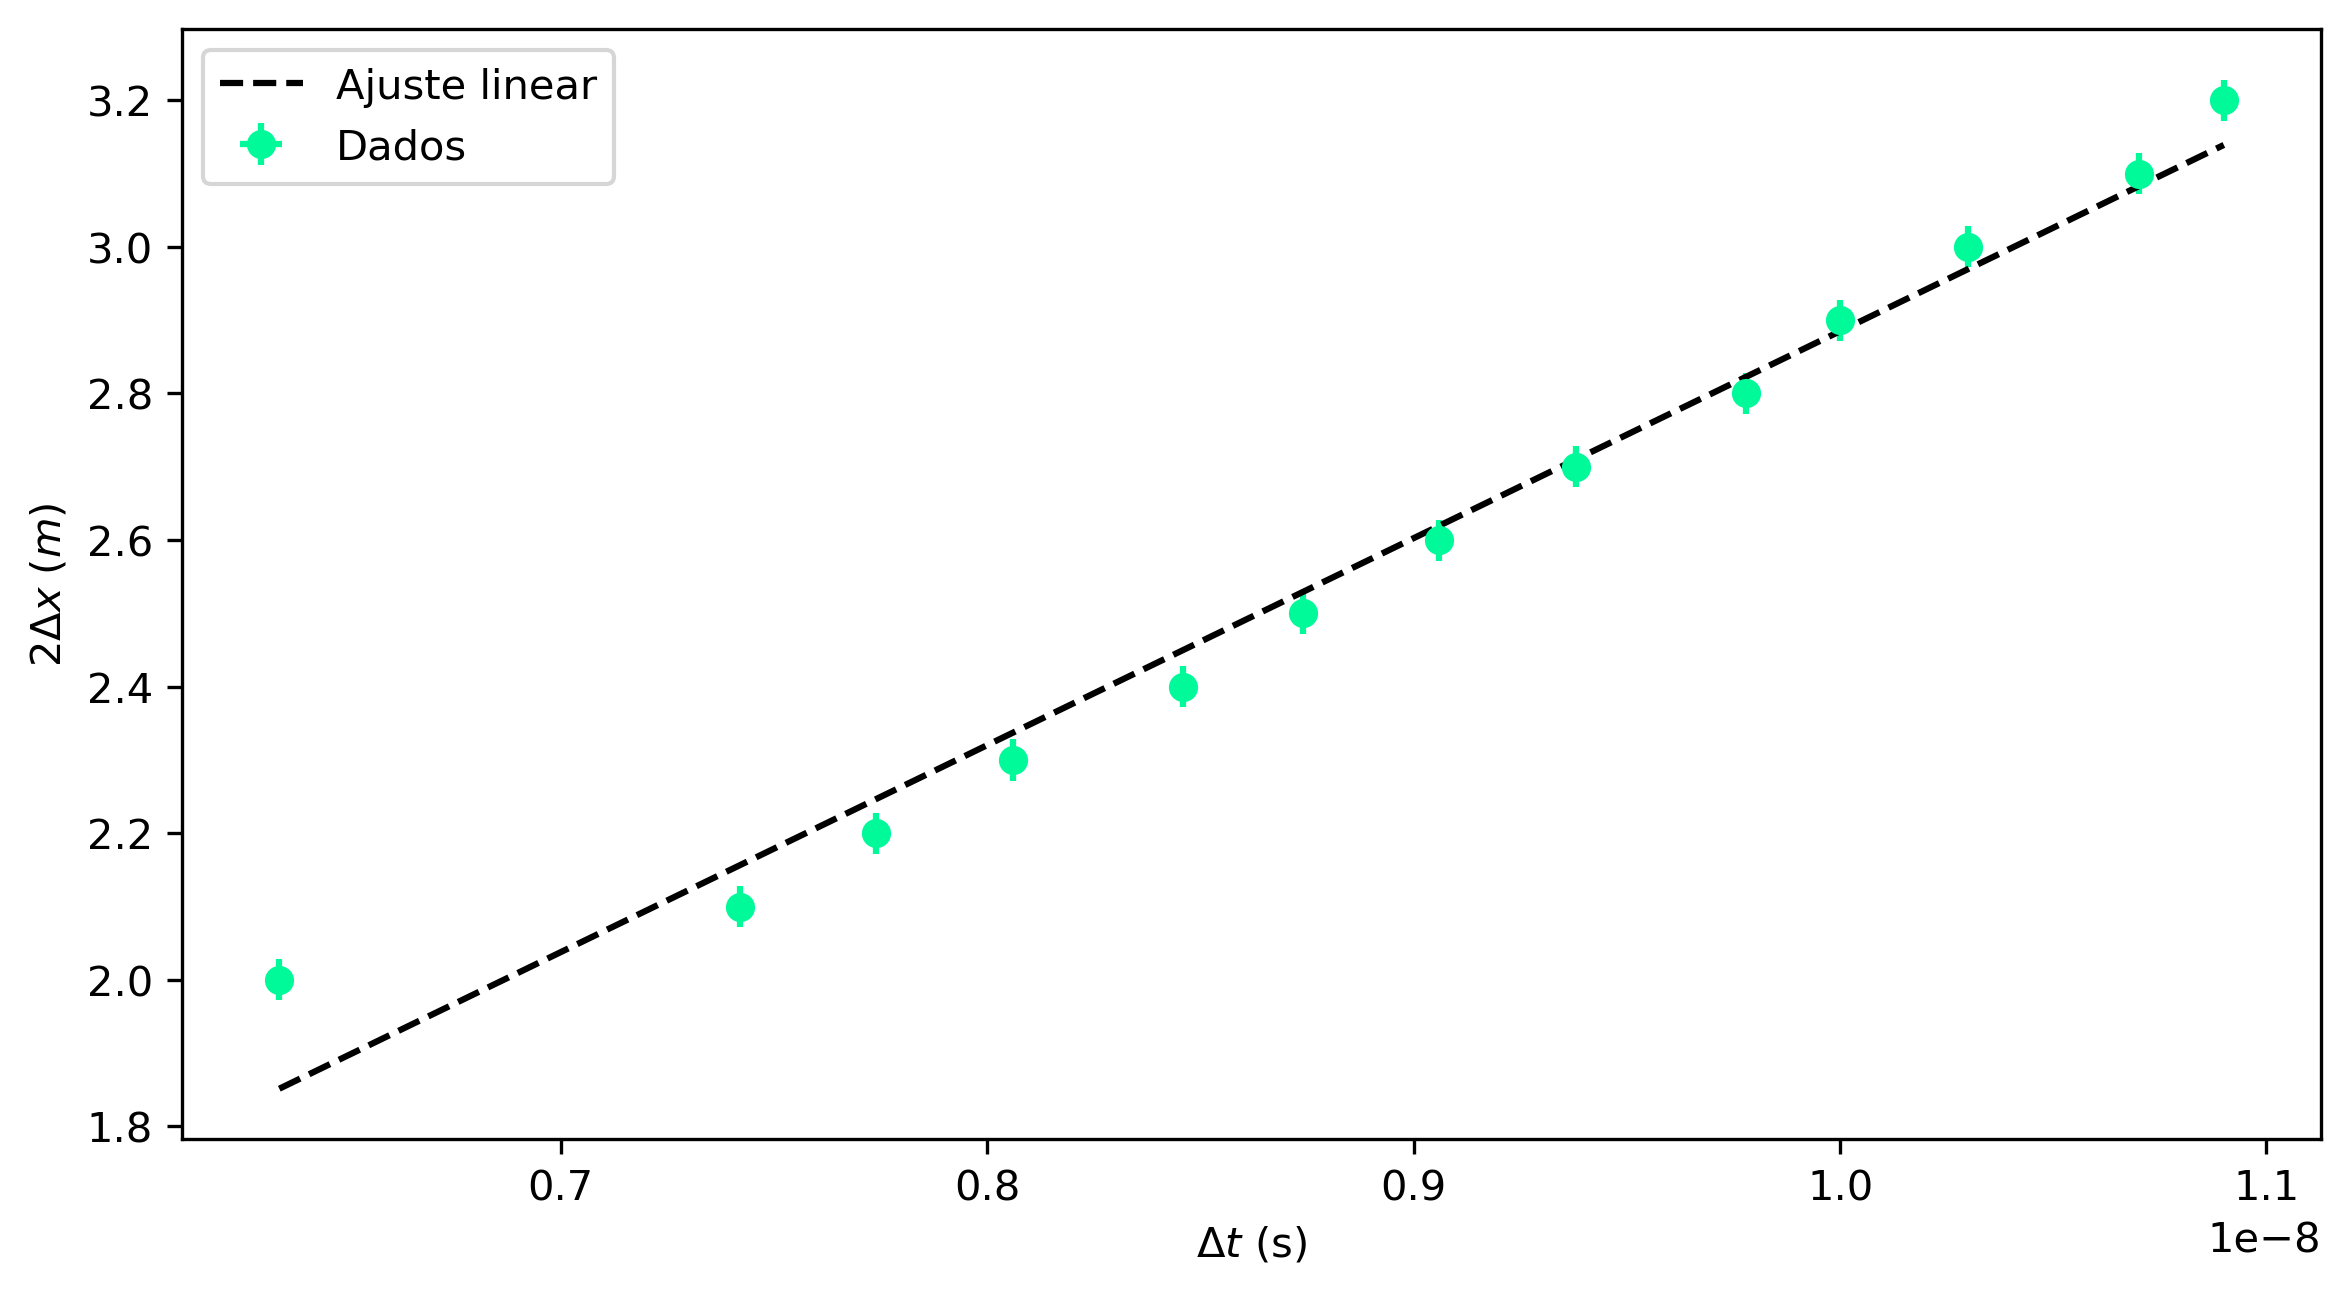

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(delta_t,2*delta_x,sigma_transf,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(delta_t,delta_t*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear')
plt.ylabel('$2\Delta x$ ($m$)')
plt.xlabel('$\Delta t$ (s)')
plt.legend()
plt.show()

# Parte 2: Índice de refração do acrílico





In [22]:
delta_x_a = np.array([23.5,22.6,22.4,23.8])*1e-2

sigma_delta_x_a = np.array(np.full(len(delta_x_a),5e-4))

l_a = np.array(np.full(len(delta_x_a), 490e-3))

## Calculando o índice de refração:

O índice de refração é dado por:

$$n_m = \frac{(\Delta x_m + l_m)}{l_m}$$


Propagando a incerteza de $\Delta x_m$:

$$\sigma_{n_m} = \sqrt{\left(\frac{\partial n_m}{\partial \Delta x_m}\right)^2\sigma_{\Delta x_m}^2}$$

$$\sigma_{n_m} = \sqrt{\left(\frac{\partial }{\partial \Delta x_m} \frac{(\Delta x_m + l_m)}{l_m}\right)^2\sigma_{\Delta x_m}^2}$$

$$\sigma_{n_m} = \sqrt{\left(\frac{1}{l_m}\right)^2\sigma_{\Delta x_m}^2}$$
$$\sigma_{n_m} = \frac{\sigma_{\Delta x_m}}{l_m}$$

In [24]:
n_a = (delta_x_a + l_a)/l_a

sigma_n_a = sigma_delta_x_a/l_a
sigma_n_a = [float('{:g}'.format(float('{:.2g}'.format(i)))) for i in sigma_n_a]

print('n_a = ',n_a)
print('sigma_n_a = ',sigma_n_a)

n_a =  [1.47959184 1.46122449 1.45714286 1.48571429]
sigma_n_a =  [0.001, 0.001, 0.001, 0.001]


## Calculando o valor médio do índice de refração:



In [26]:
n_a_mean = np.mean(n_a)


#Calculando a incerteza propagada:
sigma_n_a_mean = 0
for s in sigma_n_a:
    sigma_n_a_mean += s**2
sigma_n_a_mean = np.sqrt(sigma_n_a_mean)/len(sigma_n_a)
#Arredondando para dois algarismos significativos
sigma_n_a_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_a_mean))))

#Juntando com a estatística
sigma_n_a_mean = np.sqrt(sigma_n_a_mean**2 + (np.std(n_a)/(len(n_a)-1))**2)
sigma_n_a_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_n_a_mean))))

print('n_a = (%.3f +- %.3f)' % (n_a_mean, sigma_n_a_mean))

n_a = (1.471 +- 0.004)


In [29]:
print(1 - n_a_mean/1.49)

0.012806464867826328
